**Homeworks – Graph Theory and Algorithms, 2021/22. semester I.**

Week 1

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
from sage.graphs.trees import TreeIterator
from sage.graphs.connectivity import connected_components
import numpy as np

In [2]:
# set the seed so we can reproduce the pseudo-random results
set_random_seed(314159265)

Below you can see my implementation. 

In [3]:
def weight_for_one_edge(t, e, print_on=False):
    # delete an edge
    t.delete_edge(e)
    
    # identify the connected components
    cc = connected_components(t)
    
    # calculate the sizes of the connected components
    cc_sizes = [len(component) for component in cc]
    
    # calculate wT(e)
    weight_for_edge_e = np.prod(cc_sizes)
    
    # if print_on=True the calculation logic will be printed
    if print_on:
        print(f'deleting edge: {e}')
        print(f'    connected components: {cc}')
        print(f'    sizes of the components: {cc_sizes}')
        print(f'    weight for edge {e}: {weight_for_edge_e}')
    
    t.add_edge(e)
    return weight_for_edge_e

def weight_for_all_edges(t, print_on=False):
    w = [weight_for_one_edge(t, e, print_on) for e in t.edges()]
    return w

def sum_weights_for_edges(t, print_on=False):
    weights = weight_for_all_edges(t, print_on)
    sum_weights = sum(weights)
    return sum_weights

def max_degrees_of_trees(T):
    return [max(t.degree()) for t in T] 

In the next section I present the logic of my implementation.

You may play with the `order` parameter.
Please note that by setting `print_on=True` the function `sum_weights_for_edges()` will print out the calcuation steps of my implementation.

Example of a tree graph on 5 vertices:


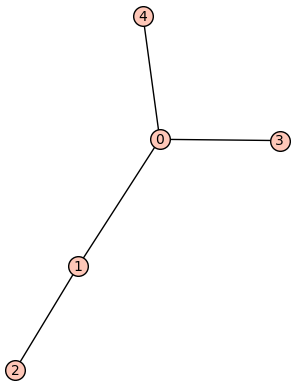

deleting edge: (0, 1, None)
    connected components: [[0, 3, 4], [1, 2]]
    sizes of the components: [3, 2]
    weight for edge (0, 1, None): 6
deleting edge: (0, 3, None)
    connected components: [[0, 1, 2, 4], [3]]
    sizes of the components: [4, 1]
    weight for edge (0, 3, None): 4
deleting edge: (0, 4, None)
    connected components: [[0, 1, 2, 3], [4]]
    sizes of the components: [4, 1]
    weight for edge (0, 4, None): 4
deleting edge: (1, 2, None)
    connected components: [[0, 1, 3, 4], [2]]
    sizes of the components: [4, 1]
    weight for edge (1, 2, None): 4


The sum weights for all edges: 18


In [4]:
# choose a tree order
order = 5

# generate a list of trees
T = [t for t in TreeIterator(order)]

# choose a random tree from the list of trees
t = T[np.random.randint(low=0, high=len(T)-1)]

# display the graph 
print(f'Example of a tree graph on {order} vertices:')
t.show()

# calculate function for selected tree graph
SumWeightsForEdges = sum_weights_for_edges(t, print_on=True)
print('\n')
print(f'The sum weights for all edges: {SumWeightsForEdges}')

**Let's calculate the function for trees created on multiple vertices.**

In the below code you may set `n_min` and `n_max` and the code will generate all posibble trees with vertices ranging from `n_min` to `n_max`.

I set `n_min=3` to `n_max=8`, because
- case $3$ and $4$ was discussed during lecture, so I could easily check the results,
- case $5$ is the solution for the *excercise 1* (although the excercise asked for a hand-written solution),
- case $7$ and $8$ is required by *excercise 2*.

I create the following dictionaries to store the results:
- `Trees`: stores the $T_n$ trees generated on $n$ vertices where $n \in [\text{n_min}, \text{n_max}]$
- `TreeValues`: stores the results of $\text{SumWeightsForEdges}(T_n)$
- `TreeDegrees`: stores the maximum degrees of trees $T_n$
- `TreeMin_ID`: stores the ID of the tree generated on $n$ vertices which has the maximum degree (and based on my heuristics for *excercise 3*, the minimal $\text{SumWeightsForEdges}(T)$, hence the name `TreeMin_ID`)
- `TreeMax_ID`: stores the ID of the tree generated on $n$ vertices which has the minimum degree (and based on my heuristics for *excercise 4*, the maximum $\text{SumWeightsForEdges}(T)$, hence the name `TreeMax_ID`)

In [5]:
# min number of vertices
n_min = 3 
n_max = 8

# max number of vertices
Trees = {f'Trees({order})': [t for t in TreeIterator(order)] for order in range(n_min,1+n_max)}
TreeValues = {order: [sum_weights_for_edges(t) for t in T] for order, T in Trees.items()}
TreeDegrees = {order: max_degrees_of_trees(T) for order, T in Trees.items()}
TreeMin_ID = {order: np.argmax(degrees) for order, degrees in TreeDegrees.items()}
TreeMax_ID = {order: np.argmin(degrees) for order, degrees in TreeDegrees.items()}

In [6]:
print('\n')
print('Main results:')
#print(f'Trees: {Trees}')
print(f'TreeValues: {TreeValues}')
print(f'TreeDegrees: {TreeDegrees}')
print(f'TreeMin_ID: {TreeMin_ID}')
print(f'TreeMax_ID: {TreeMax_ID}')



Main results:
TreeValues: {'Trees(3)': [4], 'Trees(4)': [10, 9], 'Trees(5)': [20, 18, 16], 'Trees(6)': [35, 32, 29, 31, 28, 25], 'Trees(7)': [56, 52, 50, 46, 48, 46, 42, 48, 44, 40, 36], 'Trees(8)': [84, 79, 74, 76, 71, 68, 75, 71, 70, 72, 67, 62, 66, 63, 58, 65, 67, 62, 57, 64, 59, 54, 49]}
TreeDegrees: {'Trees(3)': [2], 'Trees(4)': [2, 3], 'Trees(5)': [2, 3, 4], 'Trees(6)': [2, 3, 3, 3, 4, 5], 'Trees(7)': [2, 3, 3, 4, 3, 3, 4, 3, 4, 5, 6], 'Trees(8)': [2, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 5, 4, 4, 4, 3, 3, 4, 5, 4, 5, 6, 7]}
TreeMin_ID: {'Trees(3)': 0, 'Trees(4)': 1, 'Trees(5)': 2, 'Trees(6)': 5, 'Trees(7)': 10, 'Trees(8)': 22}
TreeMax_ID: {'Trees(3)': 0, 'Trees(4)': 0, 'Trees(5)': 0, 'Trees(6)': 0, 'Trees(7)': 0, 'Trees(8)': 0}


My heuristics are based on these outputs printed above.



Trees that minimizes the value of SumWeightsForEdges(T):


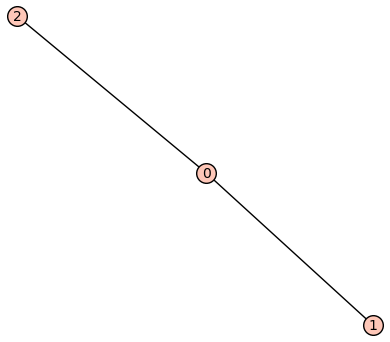

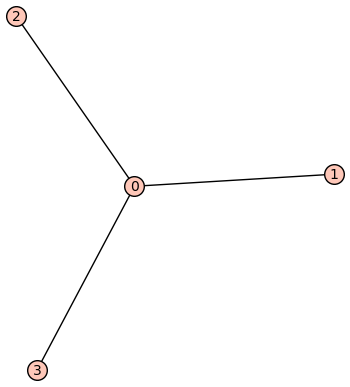

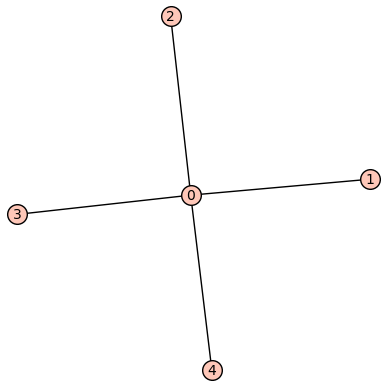

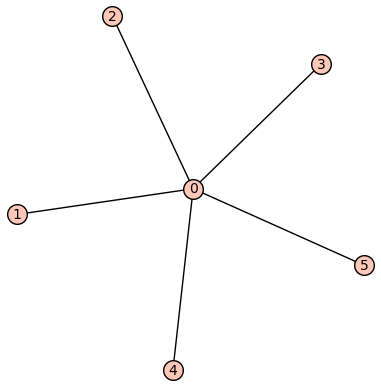

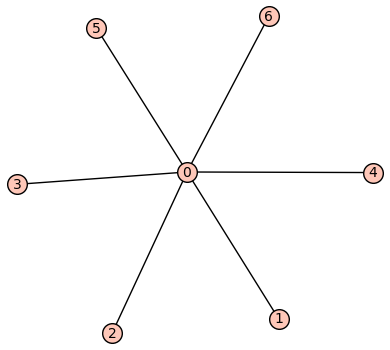

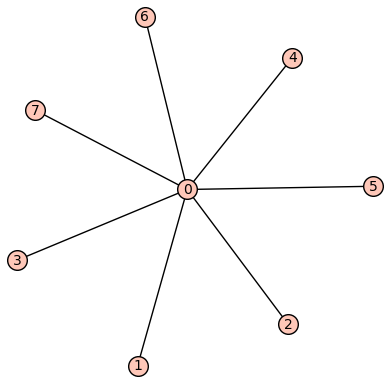

[None, None, None, None, None, None]

In [7]:
print('\n')
print('Trees that minimizes the value of SumWeightsForEdges(T):')
[Trees[order][min_id].show() for order, min_id in TreeMin_ID.items()]

Trees that maximizes the value of SumWeightsForEdges(T):


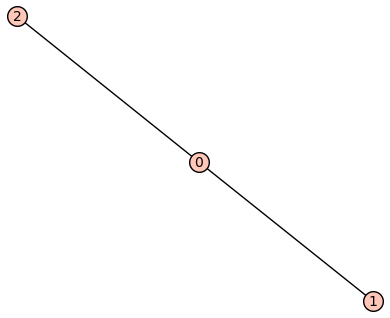

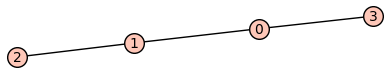

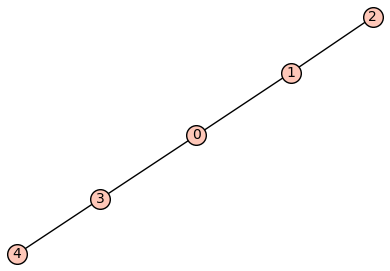

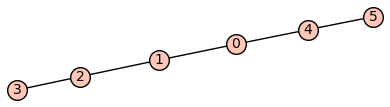

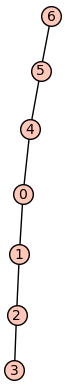

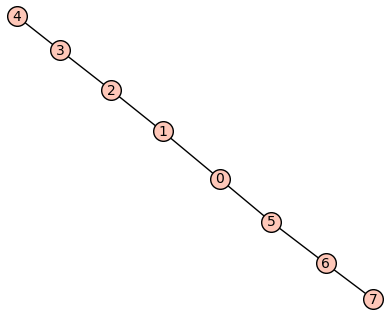

[None, None, None, None, None, None]

In [8]:
print('Trees that maximizes the value of SumWeightsForEdges(T):')
[Trees[order][max_id].show() for order, max_id in TreeMax_ID.items()]